197/197 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step
🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       184
           3       1.00      1.00      1.00       177
           4       1.00      1.00      1.00       183
           5       1.00      1.00      1.00       187
           6       1.00      1.00      1.00       176
           7       1.00      1.00      1.00       180
           8       1.00      1.00      1.00       188
           9       1.00      1.00      1.00       175
          10       1.00      1.00      1.00       176
          11       1.00      1.00      1.00       173
          12       1.00      1.00      1.00       173
          13       1.00      1.00      1.00       194
          14       1.00      1.00      1.00       190
          15       1.00      1.00      1.00       198
          1

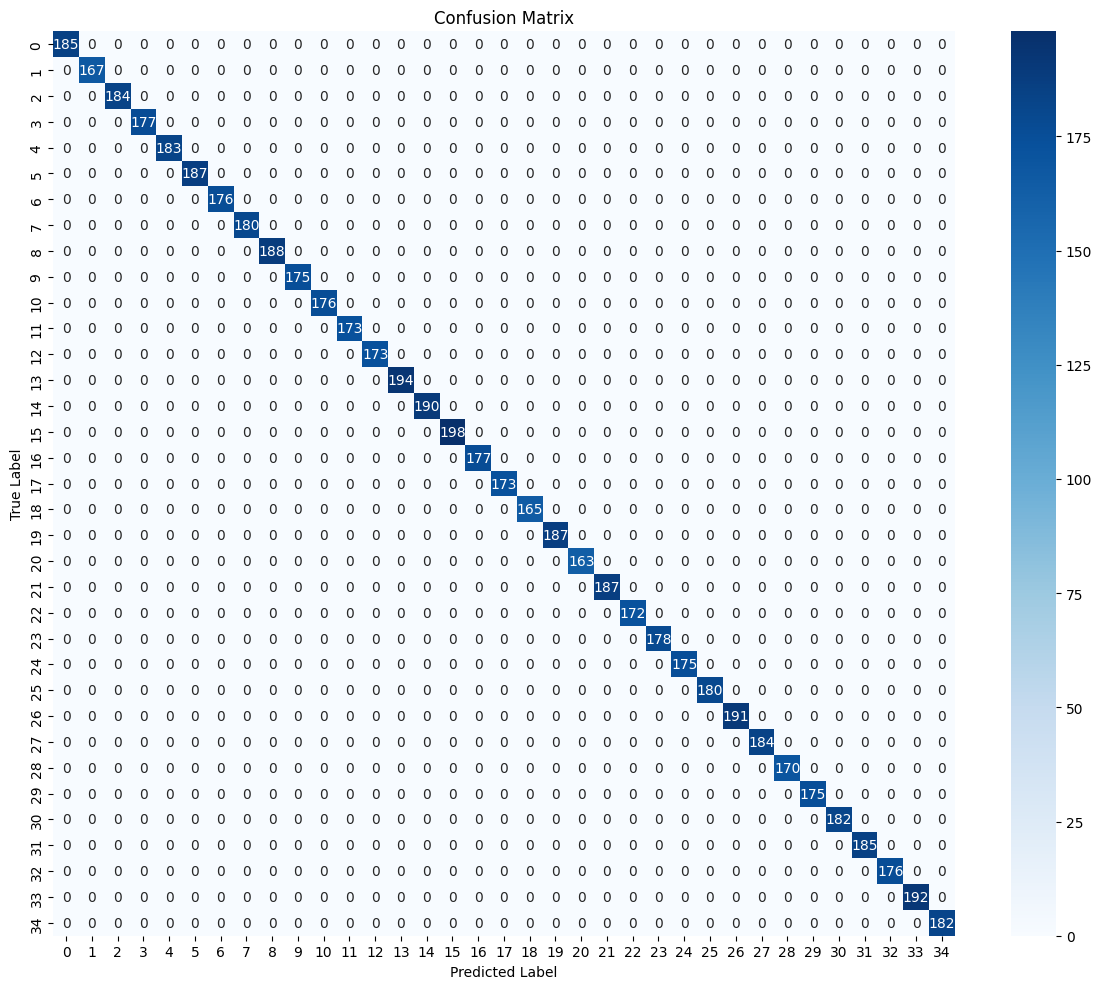

✅ Evaluation complete. Predictions and report saved to ../logs/


In [2]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
import pandas as pd

# Step 2: Load Model, Data, and Label Encoder
model = load_model("../models/best_model.h5", compile=False)
X_test = np.load("../data/processed/X_test.npy")
y_test = np.load("../data/processed/y_test.npy")
label_encoder = joblib.load("../logs/label_encoder.pkl")

# Step 3: Predict on Test Set
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 4: Classification Report
#target_names = label_encoder.inverse_transform(np.arange(y_test.shape[1]))
target_names = [str(label) for label in label_encoder.inverse_transform(np.arange(y_test.shape[1]))]
report = classification_report(y_true, y_pred, target_names=target_names)
print("🔍 Classification Report:\n", report)

# Step 5: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Step 6: Save Predictions & Report
os.makedirs("../logs", exist_ok=True)

# Save predicted labels
np.save("../logs/y_pred.npy", y_pred)
np.save("../logs/y_true.npy", y_true)

# Save human-readable predictions
df_preds = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_true),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})
df_preds.to_csv("../logs/test_predictions.csv", index=False)

# Save classification report to file
with open("../logs/classification_report.txt", "w") as f:
    f.write(report)

print("✅ Evaluation complete. Predictions and report saved to ../logs/")
